In [32]:
# importing all the neccessary dependencies for calculations and evaluation of 6 specified models
# importing all the learning classifiers following six (6) algorithms:
# 1. a single decision tree (DT)
# 2. a random forest (RF) learner
# 3. a support vector machine (SVM)
# 4. a grae
# 5. a multi-layer perceptron (MLP)
# 6. a k‐nearest neighbour (k-NN) classifier
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# undersampling
from imblearn.under_sampling import RandomUnderSampler
# Oversampling
from imblearn.over_sampling import SMOTE
# confusion metric and accuracy score evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
# Precision and recall
from sklearn.metrics import classification_report
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dataset with label choc(chocolate)

#### Importing the dataset with target label = "choc" and droping the "unnamed: 0" columns and specifying the number of rows and columns

In [11]:
df_choc = pd.read_csv("/Users/bhavneetsingh/Desktop/ML Assignment/ML_assignment-1_choc.csv")
df_choc.drop(["Unnamed: 0"], inplace = True, axis = 1)
df_choc.shape

(1885, 13)

In [12]:
df_choc.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss,choc
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,user
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,user
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,user
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,user
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,user


In [13]:
X_choc = df_choc.iloc[:,:-1].values
y_choc = df_choc.iloc[:,-1:].values

#### Data Balancing for choc dataset - Undersampling of the majority class 

In [30]:
# To Undersample the Majority Class using Random Undersampling to reduce the number of instances from the majority class. 

# Apply SMOTE to oversample the minority class
print(f"Original dataset shape: {Counter(df_choc.iloc[:,-1])}")

# Undersample the majority class
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X__choc_undersampled, y_choc_undersampled = undersampler.fit_resample(X_choc, y_choc)

print(f"Resampled dataset shape: {Counter(y_choc_undersampled)}")

Original dataset shape: Counter({'user': 1850, 'non-user': 35})
Resampled dataset shape: Counter({'non-user': 35, 'user': 35})


#### Data Balancing for choc dataset - Oversampling of the majority class 

In [67]:
# To handle the class imbalance by oversampling the minority class 
# using SMOTE (Synthetic Minority Over-sampling Technique). 

# X are (features) and y are the (labels) are your dataset
print(f"Original dataset shape: {Counter(df_choc.iloc[:,-1])}")

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_choc_oversampled, y_choc_oversampled = smote.fit_resample(X_choc, y_choc)

print(f"Resampled dataset shape: {Counter(y_choc_oversampled)}")

Original dataset shape: Counter({'user': 1850, 'non-user': 35})
Resampled dataset shape: Counter({'user': 1850, 'non-user': 1850})


#### Data Balancing for choc dataset - Combining oversampling and undersampling 

In [75]:
# Combine Undersampling and Oversampling

# Assume X (features) and y (labels) are your dataset
print(f"Original dataset shape: {Counter(df_choc.iloc[:,-1])}")

# Step 1: Undersampling to the majority class 
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Reduce majority class to 50% of its original size
X_undersampled, y_undersampled = undersampler.fit_resample(X_choc, y_choc)
print(f"After undersampling: {Counter(y_undersampled)}")

# Step 2: SMOTE to oversample the minority class 
smote = SMOTE(random_state=42)
X_choc_balanced, y_choc_balanced = smote.fit_resample(X_undersampled, y_undersampled)
print(f"After SMOTE oversampling: {Counter(y_choc_balanced)}")

Original dataset shape: Counter({'user': 1850, 'non-user': 35})
After undersampling: Counter({'user': 70, 'non-user': 35})
After SMOTE oversampling: Counter({'non-user': 70, 'user': 70})


# A function that takes all 3 types of dataset UnderSampled, OverSampled and Balanced and produces the requires resutls 

In [76]:
def machineLearningResults(X, y):
    
#   Splitting the dataset into training and test size with 80:20 ratio.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#   Employing all the required Machine Learning models
    models = {
    'Decision Tree': DecisionTreeClassifier(criterion="entropy"),
    'Random Forest': RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0),
    'SVM': SVC(kernel="linear",random_state=0, probability=True),  # Use probability=True to get probability scores for ROC curve
    'Gradient Boost': GradientBoostingClassifier(),
    'Multi Layer Perceptron': MLPClassifier(max_iter=1500),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5,p=2,metric="minkowski"),
    }
    
#   Dictionary to store accuracy scores for each model
    results = {}
    
#   Dictionary for confusion Matrix
    model_matrix = {
        'Decision Tree': [[],[]],
        'Random Forest': [[], []],
        'SVM': [[], []],
        'Gradient Boost': [[], []],
        'Multi Layer Perceptron': [[], []],
        'K-Nearest Neighbors': [[], []],
    }
    
#   Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy and store in results
        accuracy = accuracy_score(y_test, y_pred)
        results[model_name] = accuracy
        model_matrix[model_name][0] = y_test
        model_matrix[model_name][1] = y_pred
        
#   Print all accuracy results
    print("Model performance on dataset with accuracy:")
    for model_name, accuracy in results.items():
        print(f"{model_name}: {accuracy*100:.2f}%")
        
#   Confusion Matrix for all the models
    print("Model performance on dataset with confusion matrix:")
    for model_name, target_list in model_matrix.items():
        print(f"Confusion matrix for {model_name}:")
        y_test = target_list[0]
        y_pred = target_list[1]
        matrix = confusion_matrix(y_test,y_pred)
        print(matrix)
        
#   Classification report for all the models  
    print("Model performance on dataset Classification report:")
    for model_name in model_matrix:
        print(f"Classification report for {model_name}:")
        y_test = model_matrix[model_name][0]
        y_pred = model_matrix[model_name][1]
        print(classification_report(y_test, y_pred))
        
#   Evaluation by ROC curve with all the models for a particular dataset
    print("Model performance on dataset ROC curve:")
    y_preds = []
    y_true = y_test
    y_true[y_true == "user"] = 1
    y_true[y_true == "non-user"] = 0
    y_true = y_true.astype(int)
    
    # Storing predicted values of every model in y_preds for ROC plot
    for model_name, target_list in model_matrix.items():
        y_pred = target_list[1]
        y_pred[y_pred == "user"] = 1
        y_pred[y_pred == "non-user"] = 0
        y_pred = y_pred.astype(int)
        y_preds.append(y_pred)
        
    # Plotting the ROC curve
    model_names = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'Gradient Boost', 'MLP', 'KNN']
    plt.figure(figsize=(10, 8))
    for i, y_pred in enumerate(y_preds):
        fpr, tpr, _ = roc_curve(y_true, y_pred, pos_label = 1)
        roc_auc = auc(fpr, tpr)
    
        plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiple Models')
    plt.legend(loc="lower right")
    plt.show()

## Calling machineLearningResults() for undersampled dataset

Model performance on dataset with accuracy:
Decision Tree: 50.00%
Random Forest: 50.00%
SVM: 64.29%
Gradient Boost: 57.14%
Multi Layer Perceptron: 85.71%
K-Nearest Neighbors: 57.14%
Model performance on dataset with confusion matrix:
Confusion matrix for Decision Tree:
[[3 7]
 [0 4]]
Confusion matrix for Random Forest:
[[3 7]
 [0 4]]
Confusion matrix for SVM:
[[6 4]
 [1 3]]
Confusion matrix for Gradient Boost:
[[4 6]
 [0 4]]
Confusion matrix for Multi Layer Perceptron:
[[8 2]
 [0 4]]
Confusion matrix for K-Nearest Neighbors:
[[6 4]
 [2 2]]
Model performance on dataset Classification report:
Classification report for Decision Tree:
              precision    recall  f1-score   support

    non-user       1.00      0.30      0.46        10
        user       0.36      1.00      0.53         4

    accuracy                           0.50        14
   macro avg       0.68      0.65      0.50        14
weighted avg       0.82      0.50      0.48        14

Classification report for Random F

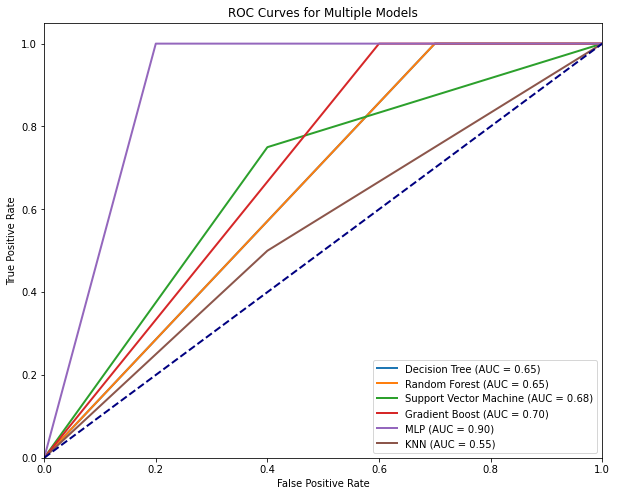

In [77]:
machineLearningResults(X__choc_undersampled, y_choc_undersampled)

## Calling machineLearningResults() for oversampled dataset

Model performance on dataset with accuracy:
Decision Tree: 97.16%
Random Forest: 99.73%
SVM: 71.22%
Gradient Boost: 98.78%
Multi Layer Perceptron: 98.78%
K-Nearest Neighbors: 91.08%
Model performance on dataset with confusion matrix:
Confusion matrix for Decision Tree:
[[348   2]
 [ 19 371]]
Confusion matrix for Random Forest:
[[348   2]
 [  0 390]]
Confusion matrix for SVM:
[[299  51]
 [162 228]]
Confusion matrix for Gradient Boost:
[[346   4]
 [  5 385]]
Confusion matrix for Multi Layer Perceptron:
[[350   0]
 [  9 381]]
Confusion matrix for K-Nearest Neighbors:
[[350   0]
 [ 66 324]]
Model performance on dataset Classification report:
Classification report for Decision Tree:
              precision    recall  f1-score   support

    non-user       0.95      0.99      0.97       350
        user       0.99      0.95      0.97       390

    accuracy                           0.97       740
   macro avg       0.97      0.97      0.97       740
weighted avg       0.97      0.97      0.

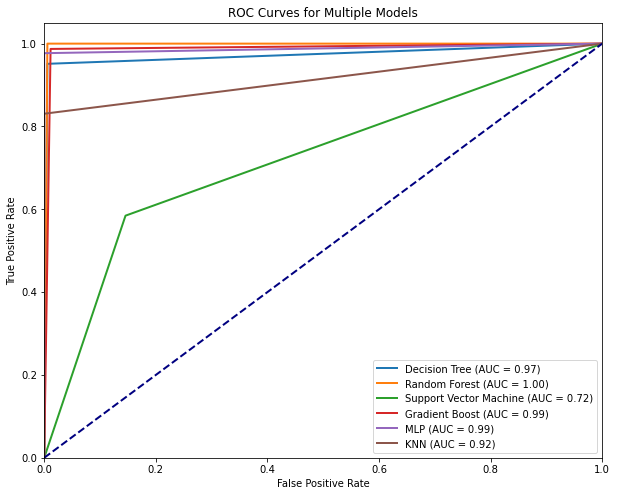

In [78]:
machineLearningResults(X_choc_oversampled, y_choc_oversampled)

## Calling machineLearningResults() for the balanced dataset

Model performance on dataset with accuracy:
Decision Tree: 75.00%
Random Forest: 67.86%
SVM: 60.71%
Gradient Boost: 75.00%
Multi Layer Perceptron: 75.00%
K-Nearest Neighbors: 57.14%
Model performance on dataset with confusion matrix:
Confusion matrix for Decision Tree:
[[11  6]
 [ 1 10]]
Confusion matrix for Random Forest:
[[11  6]
 [ 3  8]]
Confusion matrix for SVM:
[[9 8]
 [3 8]]
Confusion matrix for Gradient Boost:
[[12  5]
 [ 2  9]]
Confusion matrix for Multi Layer Perceptron:
[[12  5]
 [ 2  9]]
Confusion matrix for K-Nearest Neighbors:
[[13  4]
 [ 8  3]]
Model performance on dataset Classification report:
Classification report for Decision Tree:
              precision    recall  f1-score   support

    non-user       0.92      0.65      0.76        17
        user       0.62      0.91      0.74        11

    accuracy                           0.75        28
   macro avg       0.77      0.78      0.75        28
weighted avg       0.80      0.75      0.75        28

Classification

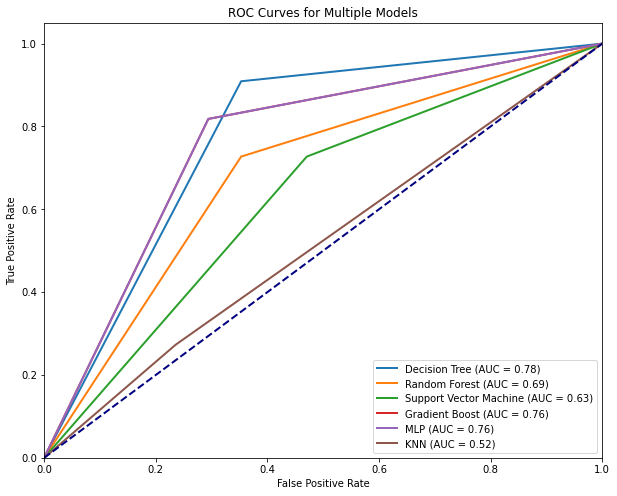

In [74]:
machineLearningResults(X_choc_balanced, y_choc_balanced)